# Time Series Analysis

## Introduction to the Python `datetime` tools
The [`datetime`](https://docs.python.org/2/library/datetime.html) module in Python stores date and time to the microsecond.  Here's an example taking a look at the current time with [`datetime.now()`](https://docs.python.org/2/library/datetime.html#datetime.datetime.now):

In [1]:
# Import the module datetime
from datetime import datetime
# Create a datetime called now with the current date/time
now = datetime.now()
# Print it out
now

datetime.datetime(2016, 1, 4, 22, 54, 56, 515556)

In [2]:
# Printing the year, month, day
print 'Year: {0}\nMonth: {1}\nDay: {2}'.format(now.year, now.month, now.day)

Year: 2016
Month: 1
Day: 4


You can also easily work with differences in datetimes with the [`timedelta`](https://docs.python.org/2/library/datetime.html#datetime.timedelta) object:

In [3]:
from datetime import timedelta
# Calculating the difference between 2 datetimes
delta = datetime(2016, 1, 8) - datetime(2015, 1, 8, 8, 15)
delta

datetime.timedelta(364, 56700)

In [4]:
# Printing the time period days and seconds
print '{0} Days, {1} Seconds'.format(delta.days, delta.seconds)

364 Days, 56700 Seconds


In [5]:
# Adding 12 days to a datetime with timedelta
start = datetime(2000, 1, 1)
start + timedelta(days=12)

datetime.datetime(2000, 1, 13, 0, 0)

In [6]:
# Subtracting 24 days from a datetime
start - 2 * timedelta(12)

datetime.datetime(1999, 12, 8, 0, 0)

### Formatting `datetimes` as Strings
You can print out datetimes in basically whatever human-readable format you like with handy methods like the following:

In [7]:
# Print out with default format
stamp = datetime.now()
str(stamp)

'2016-01-04 22:55:36.551099'

In [8]:
# Print out with custom format
stamp.strftime('%m/%d/%Y at %H:%M:%S')

'01/04/2016 at 22:55:36'

### Parsing Strings into `datetimes`
You can convert string representations into `datetime` objects in a couple ways.  The simplest if you know the parsing format is to use `datetime.strptime()` like so:

In [9]:
# Specify a date in a known format
value = '2000-01-01'
# Call the date parsing function with the date string and corresponding known format
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2000, 1, 1, 0, 0)

For more complex parsing, you can try the `parser.parse()` in the [`dateutil`](https://pypi.python.org/pypi/python-dateutil) package.  It will try to smartly parse arbitrary date strings for you:

In [10]:
# Import the parser
from dateutil.parser import parse
# Parse various dates
print parse('2000-01-01')
print parse('Aug 8 2015 6:45 PM')
print parse('6/12/2000', dayfirst = True)

2000-01-01 00:00:00
2015-08-08 18:45:00
2000-12-06 00:00:00


## Integrating `datetime` tools with Pandas for Time Series
#### The `DatetimeIndex`
Pandas has a lot of great convenience methods for working with datetime data.  When we're dealing with time series data in Pandas, we generally are talking about data where each observation is indexed by a `datetime` (rather than the row index or column name index that we've mostly been using so far).  For this Pandas combines a nice [`DatetimeIndex`](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DatetimeIndex.html) object.

Here's an example of how we might instantiate such an object, by giving Pandas a list of dates as strings for the `to_datetime()` function:

In [11]:
# Import pandas
import pandas as pd
# Create list of date strings
list_of_dates = ['1/1/2000', '2/1/2000', '3/1/2000', '4/1/2000', '5/1/2000', '6/1/2000', '7/1/2000', '8/1/2000', '9/1/2000', '10/1/2000', '11/1/2000', '12/1/2000']
# Give the dates to Pandas and watch it create a a time-based index
pd.to_datetime(list_of_dates)

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01', '2000-11-01', '2000-12-01'],
              dtype='datetime64[ns]', freq=None)

Let's see what happens if we have a null (`None`) value in our list of dates:

In [12]:
# Give Pandas a list of dates with a null value
idx = pd.to_datetime(['1/1/2000', '2/1/2000'] + [None])

You'll notice that the index now contains an `NaT` entry for **"Not a Time"** as opposed to `NaN`.  The `pd.isnull()` function is still applicable with this type:

In [13]:
# Check for null index values
pd.isnull(idx)

array([False, False,  True], dtype=bool)

### Working with Pandas Series Indexed by Datetime
Here's where we start to see some of the benefits of Pandas, by indexing our `Series` objects (thus the row indices) by `DatetimeIndex` as is natural for time series data.

Let's create a series of 12 random datapoints, 1 for each month of the year, and index it by datetimes:

In [14]:
# Import numpy for random datapoints
import numpy as np
# Create a list of dates to use (12 months for our 12 datapoints)
list_of_dates = ['1/1/2000', '2/1/2000', '3/1/2000', '4/1/2000', '5/1/2000',\
                 '6/1/2000', '7/1/2000', '8/1/2000', '9/1/2000', '10/1/2000', '11/1/2000', '12/1/2000']
# Convert dates to DatetimeIndex with Pandas
dates = pd.to_datetime(list_of_dates)
# Create a Series of 12 random numbers indexed by those dates
time_series = pd.Series(np.random.randn(12), index=dates)
time_series

2000-01-01    0.247686
2000-02-01    0.352987
2000-03-01    0.649161
2000-04-01    1.109487
2000-05-01   -0.514598
2000-06-01    0.020509
2000-07-01   -0.403894
2000-08-01   -1.373255
2000-09-01    0.732299
2000-10-01    0.624935
2000-11-01    0.521965
2000-12-01   -0.511496
dtype: float64

Notice that the type of our `time_series` is `Series` and its index is the desired `DatetimeIndex`:

In [15]:
print type(time_series)
time_series.index

<class 'pandas.core.series.Series'>


DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01', '2000-11-01', '2000-12-01'],
              dtype='datetime64[ns]', freq=None)

##### All of the same index slicing works:

In [16]:
# Take the first 8 rows every other row
time_series[0:8:2]

2000-01-01    0.247686
2000-03-01    0.649161
2000-05-01   -0.514598
2000-07-01   -0.403894
dtype: float64

In [17]:
# Take every 3rd row
time_series[::3]

2000-01-01    0.247686
2000-04-01    1.109487
2000-07-01   -0.403894
2000-10-01    0.624935
dtype: float64

##### When arithmetic operations are performed between differently-indexed time series Pandas will automatically align on dates:

In [18]:
# Only every 3rd row will be non-null, as the 2nd series only has entries for that
time_series + time_series[::3]

2000-01-01    0.495372
2000-02-01         NaN
2000-03-01         NaN
2000-04-01    2.218974
2000-05-01         NaN
2000-06-01         NaN
2000-07-01   -0.807789
2000-08-01         NaN
2000-09-01         NaN
2000-10-01    1.249871
2000-11-01         NaN
2000-12-01         NaN
dtype: float64

##### Pandas stores timestamps using Numpy's datetime64 data type, which has nanoseond resolution!

Let's try to generate a Time Series of 1000 days with 1000 random datapoints starting with 1/1/2000 using the [`pd.date_range()`](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.date_range.html) function.

In [19]:
# 1000 random datapoints over 1000 index days
long_time_series = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
long_time_series.head()

2000-01-01   -0.277544
2000-01-02    0.494908
2000-01-03    0.385816
2000-01-04    0.387869
2000-01-05   -0.481524
Freq: D, dtype: float64

Notice that when you print the series, it displays "Freq: D".  This is because the default frequency for the `date_range()` function is daily.  You can specify ***all sorts of frequency specifiers*** to generate a time series via the `freq` parameter when you call `date_range()`!

Take a look at all of these different [frequency specifiers](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)!
- B:	business day frequency
- C:	custom business day frequency (experimental)
- D:	calendar day frequency
- W:	weekly frequency
- M:	month end frequency
- BM:	business month end frequency
- CBM:	custom business month end frequency
- MS:	month start frequency
- BMS:	business month start frequency
- CBMS:	custom business month start frequency
- Q:	quarter end frequency
- BQ:	business quarter endfrequency
- QS:	quarter start frequency
- BQS:	business quarter start frequency
- A:	year end frequency
- BA:	business year end frequency
- AS:	year start frequency
- BAS:	business year start frequency
- BH:	business hour frequency
- H:	hourly frequency
- T, min:	minutely frequency
- S:	secondly frequency
- L, ms:	milliseonds
- U, us:	microseconds
- N:	nanoseconds

You can take these base frequencies ***even further*** as we'll see examples of later!

#### Selecting Data - use a date or a date string

In [20]:
long_time_series['2002-02-01']

-0.77429744998238059

In [21]:
long_time_series['20020201']

-0.77429744998238059

In [22]:
long_time_series['2002-05']

2002-05-01   -0.460130
2002-05-02   -0.782020
2002-05-03    0.702108
2002-05-04    1.226212
2002-05-05    1.554639
2002-05-06    1.199292
2002-05-07   -2.622794
2002-05-08    0.482336
2002-05-09   -0.275066
2002-05-10   -1.579846
2002-05-11   -1.516765
2002-05-12    1.204804
2002-05-13    1.806784
2002-05-14   -0.703541
2002-05-15    1.383428
2002-05-16   -1.142712
2002-05-17    0.370231
2002-05-18    0.022556
2002-05-19    0.587224
2002-05-20   -0.405385
2002-05-21    0.401231
2002-05-22   -0.077161
2002-05-23    0.626511
2002-05-24    0.319402
2002-05-25   -0.369941
2002-05-26    0.981273
2002-05-27   -1.492924
2002-05-28   -0.915298
2002-05-29   -2.306862
2002-05-30    0.073396
2002-05-31   -1.415847
Freq: D, dtype: float64

In [23]:
# Subset using start/stop times
long_time_series['1/1/2000':'1/10/2000']

2000-01-01   -0.277544
2000-01-02    0.494908
2000-01-03    0.385816
2000-01-04    0.387869
2000-01-05   -0.481524
2000-01-06   -1.111988
2000-01-07    0.326385
2000-01-08    0.659792
2000-01-09   -0.777905
2000-01-10   -0.609678
Freq: D, dtype: float64

#### Fun with `date_range`:
As alluded to above, with the `date_range` function you can do all sorts of awesome things to generate customized tim series datetime indices.

For instance, you can control the frequency and length:

In [24]:
# Create a date range of the first 100 Wednesdays starting 1/1/1995
dates = pd.date_range('1/1/1995', periods=100, freq='W-WED')
# Generate 4 columns of 100 random datapoints for that date range
df = pd.DataFrame(np.random.rand(100, 4), index = dates, columns = ['New York', "Michigan", "Oregon", "Alaska"])
df.iloc[10:15]

,New York,Michigan,Oregon,Alaska
1995-03-15,0.965190,0.268516,0.743761,0.623723
1995-03-22,0.787020,0.012164,0.038446,0.482696
1995-03-29,0.750473,0.406939,0.754426,0.724913
1995-04-05,0.131270,0.220598,0.003336,0.469422
1995-04-12,0.972768,0.116171,0.653317,0.588214


In [26]:
# Alternative indexing
df.ix['1995, 03, 29']

New York    0.750473
Michigan    0.406939
Oregon      0.754426
Alaska      0.724913
Name: 1995-03-29 00:00:00, dtype: float64
New York    0.750473
Michigan    0.406939
Oregon      0.754426
Alaska      0.724913
Name: 1995-03-29 00:00:00, dtype: float64


In [ ]:
# Alternative Indexing
df.ix['19950329']

In [27]:
df.ix['19950329':'19950629']

,New York,Michigan,Oregon,Alaska
1995-03-29,0.750473,0.406939,0.754426,0.724913
1995-04-05,0.131270,0.220598,0.003336,0.469422
1995-04-12,0.972768,0.116171,0.653317,0.588214
1995-04-19,0.678301,0.516198,0.429679,0.861331
1995-04-26,0.362844,0.119176,0.935751,0.848691
1995-05-03,0.333159,0.623859,0.903582,0.961390
1995-05-10,0.491178,0.990482,0.224722,0.678281
1995-05-17,0.690909,0.219581,0.441164,0.930578
1995-05-24,0.816671,0.001206,0.472651,0.027141
1995-05-31,0.366821,0.650671,0.458227,0.571377


##### Dealing With Frequency Offsets and Multipliers

In [29]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
print hour
six_hours = Hour(6)
six_hours

<Hour>


<6 * Hours>

In [30]:
# Date Range for the first day of 1990 every 6 hours
pd.date_range('1/1/1990', '1/1/1990 23:59', freq='6H')

DatetimeIndex(['1990-01-01 00:00:00', '1990-01-01 06:00:00',
               '1990-01-01 12:00:00', '1990-01-01 18:00:00'],
              dtype='datetime64[ns]', freq='6H')

In [31]:
# Date Range for the first day of 1990 every 2:45
pd.date_range('1/1/1990', '1/1/1990 23:59', freq=Hour(2)+Minute(45))

DatetimeIndex(['1990-01-01 00:00:00', '1990-01-01 02:45:00',
               '1990-01-01 05:30:00', '1990-01-01 08:15:00',
               '1990-01-01 11:00:00', '1990-01-01 13:45:00',
               '1990-01-01 16:30:00', '1990-01-01 19:15:00',
               '1990-01-01 22:00:00'],
              dtype='datetime64[ns]', freq='165T')

In [33]:
# Date Range for the first 6 months of 1990, using the 3rd Friday of the month via "Week of the Month" specifier
pd.date_range('1/1/1990', '6/1/1990', freq='WOM-3FRI')

DatetimeIndex(['1990-01-19', '1990-02-16', '1990-03-16', '1990-04-20',
               '1990-05-18'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [34]:
# last business day of the month
pd.date_range('1/1/2015', '8/1/2015', freq='BM')

DatetimeIndex(['2015-01-30', '2015-02-27', '2015-03-31', '2015-04-30',
               '2015-05-29', '2015-06-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='BM')

In [35]:
#last calendar day of the month
pd.date_range('1/1/2015', '8/1/2015', freq='M')

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='M')

##### With all these specifiers you can accomplish just about any datetime indexing that you want!!

### Changing the Game: Shifting Data - Leading and Lagging
`Series` and `DataFrame` have a [`shift()`](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.shift.html) method, which moves time series data forward or backward, leaving the index the same:

In [36]:
# Create a time series
time_s = pd.Series(np.random.randn(4), index = pd.date_range('1/1/1960', periods = 4, freq = 'M'))
time_s

1960-01-31    1.532763
1960-02-29   -1.978182
1960-03-31   -0.767418
1960-04-30    1.292897
Freq: M, dtype: float64

In [37]:
# shift the series forward 2 months
time_s.shift(2)

1960-01-31         NaN
1960-02-29         NaN
1960-03-31    1.532763
1960-04-30   -1.978182
Freq: M, dtype: float64

In [38]:
# shift back 2 months
time_s.shift(-2)

1960-01-31   -0.767418
1960-02-29    1.292897
1960-03-31         NaN
1960-04-30         NaN
Freq: M, dtype: float64

In the above 2 examples, data is discarded. If the period is known however, you can advance the timestamps if required:

In [39]:
# Shift forward 2 but have the indexes keep up
time_s.shift(2, freq='M')

1960-03-31    1.532763
1960-04-30   -1.978182
1960-05-31   -0.767418
1960-06-30    1.292897
Freq: M, dtype: float64

### Filling the Gaps: Resampling and Frequency Conversion
***Resampling*** refers to the process of converting a time series from one frequency to another.

***Down sampling*** means converting higher frequency data to a lower frequency.

***Up sampling*** means converting lower frequency data to a higher frequency.

`Pandas` has its own glorious [`resample()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) method that can do everything you've ever dreamed of:
- freq: Indicates the desired resample frequency
- how: Function name that produces the aggregated values (defaults to 'mean')
- fill_method: How to interpolate when upsampling, 'ffill' for forward fill, 'bfill' for backfill
- kind: aggregates to periods ('period') or timestamps('timestamp'), defaulting to the kind of index the time series already has

Let's take a look!

In [42]:
# Create a time series to play with
date_range = pd.date_range('1/1/1980', periods = 12, freq='T')
ts_A = pd.Series(np.arange(12), index=date_range)
ts_A

1980-01-01 00:00:00     0
1980-01-01 00:01:00     1
1980-01-01 00:02:00     2
1980-01-01 00:03:00     3
1980-01-01 00:04:00     4
1980-01-01 00:05:00     5
1980-01-01 00:06:00     6
1980-01-01 00:07:00     7
1980-01-01 00:08:00     8
1980-01-01 00:09:00     9
1980-01-01 00:10:00    10
1980-01-01 00:11:00    11
Freq: T, dtype: int64

#### Downsampling and Aggregation
- aggregating data to a regular, lower frequency
- not an uncommon operation
- the desired frequency defines bin edges. These slice the time series into pieces to aggregate.
- the intervals are said to be 'half open', and thought must go into which side of an interval is  closed
- the new bins have to be labeled using either the start or the end of the interval

In [43]:
# Downsample to 5 minute intervals, by taking the sum of each interval
ts_B1 = ts_A.resample('5min', how='sum', closed='right', label='left')
ts_B1

1979-12-31 23:55:00     0
1980-01-01 00:00:00    15
1980-01-01 00:05:00    40
1980-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [45]:
# Downsample to 5 minute intervals, by taking the sum of each interval
ts_B2 = ts_A.resample('5min', how='sum', closed='right', label='right')
ts_B2

1980-01-01 00:00:00     0
1980-01-01 00:05:00    15
1980-01-01 00:10:00    40
1980-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [46]:
# Downsample to 5 minute intervals, by taking the sum of each interval
ts_B3 = ts_A.resample('5min', how='sum', closed='left', label='left')
ts_B3

1980-01-01 00:00:00    10
1980-01-01 00:05:00    35
1980-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [47]:
# Downsample to 5 minute intervals, by taking the sum of each interval
ts_B4 = ts_A.resample('5min', how='sum', closed='left', label='right')
ts_B4

1980-01-01 00:05:00    10
1980-01-01 00:10:00    35
1980-01-01 00:15:00    21
Freq: 5T, dtype: int64

You can also shift the index by a time amount if needed:

In [49]:
# Downsample to 5 minute intervals, by taking the sum of each interval, also shift the time index
ts_B5 = ts_A.resample('5min', how='sum', closed='left', label='left', loffset='+150S')
ts_B5

1980-01-01 00:02:30    10
1980-01-01 00:07:30    35
1980-01-01 00:12:30    21
Freq: 5T, dtype: int64

##### [Open-High-Low-Close Resampling](https://en.wikipedia.org/wiki/Open-high-low-close_chart) often seen with stocks:

In [50]:
ts_B6 = ts_A.resample('5min', how='ohlc', closed='right', label='right')
ts_B6

,open,high,low,close
1980-01-01 00:00:00,0,0,0,0
1980-01-01 00:05:00,1,5,1,5
1980-01-01 00:10:00,6,10,6,10
1980-01-01 00:15:00,11,11,11,11


#### Upsampling and Interpolation
Hopefully it is apparent that when you upsample you do not need to aggregate.  You are, in fact, creating more data buckets than  you have samples of data to fill.  

We need to ***interpolate*** those new datapoints!

##### How might we approach this?
Ideas???

Let's create a toy dataset to try it out with:

In [51]:
time_frame = pd.DataFrame(np.random.randn(2, 4), index = pd.date_range('1/1/1980', periods = 2, freq = 'W-WED'), \
columns = ["Sussex", "Kent", "Lancashire", "London"])
time_frame

,Sussex,Kent,Lancashire,London
1980-01-02,1.716919,0.695291,-0.520159,0.360580
1980-01-09,-1.075781,0.124587,0.584277,-0.582598


Let's resample the weekly time series to a daily level by ***"forward filling"*** the values that will be missing.  Make sure you can understand what's going on here:

In [52]:
time_frame_daily = time_frame.resample('D')
time_frame_daily

,Sussex,Kent,Lancashire,London
1980-01-02,1.716919,0.695291,-0.520159,0.360580
1980-01-03,NaN,NaN,NaN,NaN
1980-01-04,NaN,NaN,NaN,NaN
1980-01-05,NaN,NaN,NaN,NaN
1980-01-06,NaN,NaN,NaN,NaN
1980-01-07,NaN,NaN,NaN,NaN
1980-01-08,NaN,NaN,NaN,NaN
1980-01-09,-1.075781,0.124587,0.584277,-0.582598


In [54]:
# Forward fill
time_frame_daily_B = time_frame.resample('D', fill_method='ffill')
time_frame_daily_B

,Sussex,Kent,Lancashire,London
1980-01-02,1.716919,0.695291,-0.520159,0.360580
1980-01-03,1.716919,0.695291,-0.520159,0.360580
1980-01-04,1.716919,0.695291,-0.520159,0.360580
1980-01-05,1.716919,0.695291,-0.520159,0.360580
1980-01-06,1.716919,0.695291,-0.520159,0.360580
1980-01-07,1.716919,0.695291,-0.520159,0.360580
1980-01-08,1.716919,0.695291,-0.520159,0.360580
1980-01-09,-1.075781,0.124587,0.584277,-0.582598


Or we can try a backward fill:

In [55]:
# Backward fill
time_frame_daily_C = time_frame.resample('D', fill_method='bfill')
time_frame_daily_C

,Sussex,Kent,Lancashire,London
1980-01-02,1.716919,0.695291,-0.520159,0.360580
1980-01-03,-1.075781,0.124587,0.584277,-0.582598
1980-01-04,-1.075781,0.124587,0.584277,-0.582598
1980-01-05,-1.075781,0.124587,0.584277,-0.582598
1980-01-06,-1.075781,0.124587,0.584277,-0.582598
1980-01-07,-1.075781,0.124587,0.584277,-0.582598
1980-01-08,-1.075781,0.124587,0.584277,-0.582598
1980-01-09,-1.075781,0.124587,0.584277,-0.582598


Check out the `resample()` method documentation to see other ways you can interpolate data!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from random import choice
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

## Example of Time Series Modeling - Building an AR Model

####Going to use Ebola Deaths as an example

In [2]:
df = pd.DataFrame.from_csv('https://raw.githubusercontent.com/cmrivers/ebola/master/country_timeseries.csv',\
                           index_col=0)

In [3]:
df.columns

Index([u'Day', u'Cases_Guinea', u'Cases_Liberia', u'Cases_SierraLeone',
       u'Cases_Nigeria', u'Cases_Senegal', u'Cases_UnitedStates',
       u'Cases_Spain', u'Cases_Mali', u'Deaths_Guinea', u'Deaths_Liberia',
       u'Deaths_SierraLeone', u'Deaths_Nigeria', u'Deaths_Senegal',
       u'Deaths_UnitedStates', u'Deaths_Spain', u'Deaths_Mali'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2015-01-05 to 2014-03-22
Data columns (total 17 columns):
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1)
memory usage: 17.2 KB


####We need to impute missing data values, in order to preserve as much of the time series as possible

###Look at "both" ends of this data

In [5]:
deathColList = ["Deaths_Guinea", "Deaths_Liberia", "Deaths_SierraLeone"]

df.sort("Day", ascending=False)[deathColList][1:2]

,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone
Date,,,
2015-01-04,1781,NaN,2943


In [7]:
df.sort("Day", ascending=True)[deathColList][1:2]

,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone
Date,,,
2014-03-24,59,NaN,NaN


##### Use both a backfill AND a forward fill in order to fill all the NAs. 

In [8]:
df1 = df.bfill()
df1 = df1.ffill()

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2015-01-05 to 2014-03-22
Data columns (total 17 columns):
Day                    122 non-null int64
Cases_Guinea           122 non-null float64
Cases_Liberia          122 non-null float64
Cases_SierraLeone      122 non-null float64
Cases_Nigeria          122 non-null float64
Cases_Senegal          122 non-null float64
Cases_UnitedStates     122 non-null float64
Cases_Spain            122 non-null float64
Cases_Mali             122 non-null float64
Deaths_Guinea          122 non-null float64
Deaths_Liberia         122 non-null float64
Deaths_SierraLeone     122 non-null float64
Deaths_Nigeria         122 non-null float64
Deaths_Senegal         122 non-null float64
Deaths_UnitedStates    122 non-null float64
Deaths_Spain           122 non-null float64
Deaths_Mali            122 non-null float64
dtypes: float64(16), int64(1)
memory usage: 17.2 KB


In [9]:
df1.sort("Day", ascending=False)[deathColList][1:2]

,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone
Date,,,
2015-01-04,1781,3496,2943


In [10]:
df1.sort("Day", ascending=True)[deathColList][1:2]

,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone
Date,,,
2014-03-24,59,6,5


In [10]:
deaths_df = df1[deathColList]

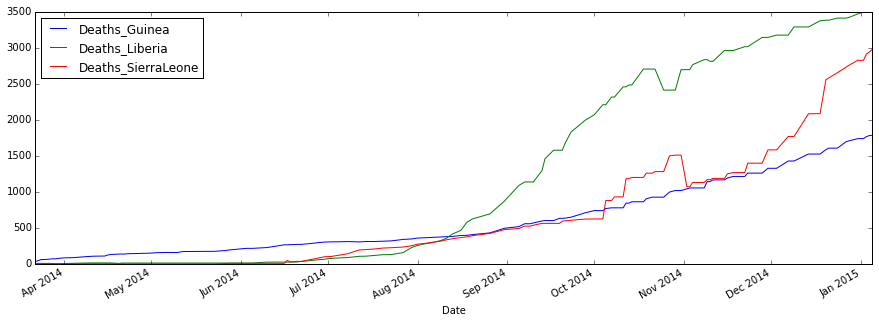

In [11]:
deaths_df.plot(figsize=(15,5))

---
#Auto-regressive Modelling
---

---
###- time series x[t-5], x[t-4], x[t-3], x[t-2], x[t-1], x[t], y
###- y is the first future point, we are trying to predict y
###- build a model to predict the current values 
###- x[t] =  theta0 + theta1 * x[t-1] + theta2 * x[t-2] + theta3 * x[t-3]
###- x[t-1] = theta0 + theta1 * x[t -2] + theta2 * [t-3] + theta3 * x[t-4]
###- etc etc...utilizing past data
###- Then use the parameters theta to predict y, using y = theta0 + theta1 * x[t] + theta2 * x[t-1] + theta3 * x[t-2]
---

####The following cell illustrates basic time series modelling
####It's a good start to get your head round what's going on, in terms of lagging columns
####The data has only a single column
####You lag this column by 1 time value to create a new column
####Your Auto-regressive model size determines how many lagged columns you create
####Then you build your model using the *rows* of all the lagged columns

In [12]:
colList = deaths_df.columns

#For example purposes just try and predict the deaths for the first country in the column list
#So the data just has a single column of data
cols = colList[0]

#For convenience set the deaths column to y
y = deaths_df[cols]
y.head(2)

Date
2015-01-05    1786
2015-01-04    1781
Name: Deaths_Guinea, dtype: float64

In [13]:
#We use the first half of the data to train on
#This is not ideal - you really want to use a fixed size moving window to train on as your time series progresses
#However, this is not a bad place to start!
print "y has {:d} many rows".format(len(y))
train_end = len(y)/2
print "training location end is {:d}".format(train_end)

print "So the first 5 rows of data that we will be predicting are:"
print "--------------------------------"
print y[train_end: train_end + 5]
print "--------------------------------\n"

y has 122 many rows
training location end is 61
So the first 5 rows of data that we will be predicting are:
--------------------------------
Date
2014-08-18    396
2014-08-16    394
2014-08-13    380
2014-08-11    377
2014-08-09    373
Name: Deaths_Guinea, dtype: float64
--------------------------------



In [14]:
#ar_size represents the size of your Auto-regressive model
#so if your model size is 4 then use x1 (at time t-4), x2 (at time t-3), x3 (at time t-2), x4 (at time t-1)
#to predict x5 (the current value)

ar_size = 4
    
#Obviously you need to lag your column by 1, up to ar_size in order to get your training data
#You get as many columns as you need because of ar_size
lagged = pd.concat([y.shift(i+1) for i in xrange(ar_size)], axis=1)
lagged.columns = ['DG_lag1', 'DG_lag2', 'DG_lag3', 'DG_lag4']

print "here are the first 10 rows of the lagged data"
print "ar_size if 4 so you have 4 columns, each lagged by 1"
print "clearly you can't use the first ar_size rows because as you lag you create NaNs"
print "--------------------------------"
print lagged[0:10], "\n\n"
print "--------------------------------\n"
print "--------------------------------"
print lagged[train_end: train_end + 10], "\n\n"
print "--------------------------------\n"

here are the first 10 rows of the lagged data
ar_size if 4 so you have 4 columns, each lagged by 1
clearly you can't use the first ar_size rows because as you lag you create NaNs
--------------------------------
            DG_lag1  DG_lag2  DG_lag3  DG_lag4
Date                                          
2015-01-05      NaN      NaN      NaN      NaN
2015-01-04     1786      NaN      NaN      NaN
2015-01-03     1781     1786      NaN      NaN
2015-01-02     1767     1781     1786      NaN
2014-12-31     1739     1767     1781     1786
2014-12-28     1739     1739     1767     1781
2014-12-27     1708     1739     1739     1767
2014-12-24     1697     1708     1739     1739
2014-12-21     1607     1697     1708     1739
2014-12-20     1607     1607     1697     1708 


--------------------------------

--------------------------------
            DG_lag1  DG_lag2  DG_lag3  DG_lag4
Date                                          
2014-08-18      406      430      494      517
2014-08-16   

In [16]:
#The training set will consist of all the lagged columns and the first half of the rows
#Here's your X and y for the model:
X = lagged.ix[ar_size:train_end]
yy = y.ix[ar_size:train_end]
print X.ix[0:5]
print yy.ix[0:5]

            DG_lag1  DG_lag2  DG_lag3  DG_lag4
Date                                          
2014-12-31     1739     1767     1781     1786
2014-12-28     1739     1739     1767     1781
2014-12-27     1708     1739     1739     1767
2014-12-24     1697     1708     1739     1739
2014-12-21     1607     1697     1708     1739
Date
2014-12-31    1739
2014-12-28    1708
2014-12-27    1697
2014-12-24    1607
2014-12-21    1607
Name: Deaths_Guinea, dtype: float64


In [18]:
#Look at the five rows of the training set and test set
#See what pd.shift is doing
print "--------------------------------"
print "Build a model using these values: \n",
for m in xrange(5):
    for k in xrange(ar_size - 1, -1, -1):
        print X.ix[m][k],
    print "to predict this value: ",
    print yy[m],
    print "and"
print "--------------------------------\n"

--------------------------------
Build a model using these values: 
1786.0 1781.0 1767.0 1739.0 to predict this value:  1739.0 and
1781.0 1767.0 1739.0 1739.0 to predict this value:  1708.0 and
1767.0 1739.0 1739.0 1708.0 to predict this value:  1697.0 and
1739.0 1739.0 1708.0 1697.0 to predict this value:  1607.0 and
1739.0 1708.0 1697.0 1607.0 to predict this value:  1607.0 and
--------------------------------



---
###Fit a single model to the first half of your data to predict the second half
---

In [19]:
y = deaths_df[cols]
train_end = len(y)/2
ar_size = 4
lagged = pd.concat([y.shift(i+1) for i in xrange(ar_size)], axis=1)
lagged.columns = [range(ar_size)]
X = lagged.ix[ar_size:train_end]
yy = y.ix[ar_size:train_end]
lagged.ix[0:10]

,0,1,2,3
Date,,,,
2015-01-05,NaN,NaN,NaN,NaN
2015-01-04,1786,NaN,NaN,NaN
2015-01-03,1781,1786,NaN,NaN
2015-01-02,1767,1781,1786,NaN
2014-12-31,1739,1767,1781,1786
2014-12-28,1739,1739,1767,1781
2014-12-27,1708,1739,1739,1767
2014-12-24,1697,1708,1739,1739
2014-12-21,1607,1697,1708,1739


In [20]:
#Now fit your model    
clf = LinearRegression()
clf.fit(X, yy)
    
predictions = []
#Now use the model to predict the second half of the data
mse = 0.0
count = 0.0
print "------------------------------------"
print "Predicted        Actual       Error"
for t in xrange(train_end, len(y)):
    y_hat = clf.predict(lagged.ix[t])
    print "{:11.2f} {:11.2f} {:11.2f}".format(y_hat[0], y.ix[t], np.abs(y_hat[0]-y.ix[t]))
    mse += (y_hat[0]-y.ix[t]) * (y_hat[0]-y.ix[t])
    count += 1
mse = np.sqrt(mse)/count
print "Mean Squared Error is {0:}".format(mse)

------------------------------------
Predicted        Actual       Error
     391.83      396.00        4.17
     382.28      394.00       11.72
     374.53      380.00        5.47
     364.55      377.00       12.45
     356.11      373.00       16.89
     354.17      367.00       12.83
     348.03      363.00       14.97
     343.33      358.00       14.67
     339.08      346.00        6.92
     329.73      339.00        9.27
     320.68      319.00        1.68
     306.85      314.00        7.15
     295.13      310.00       14.87
     292.72      310.00       17.28
     289.95      304.00       14.05
     286.46      309.00       22.54
     286.53      307.00       20.47
     288.32      305.00       16.68
     285.04      303.00       17.96
     283.68      270.00       13.68
     263.08      270.00        6.92
     248.92      267.00       18.08
     251.50      267.00       15.50
     247.35      264.00       16.65
     245.96      264.00       18.04
     244.40      226.00    

---
###Use a moving window
###This trains a new model as the window slides over the data
###The window is of fixed size
###This means the latest data gets incorporated into a new model and old data drops out the back of the window
---

In [20]:
y = deaths_df[cols]
train_end = len(y)/2
ar_size = 4
lagged = pd.concat([y.shift(i+1) for i in xrange(ar_size)], axis=1)
lagged.columns = [range(ar_size)]
clfB = LinearRegression()

predictionsB = []
#Now use the model to predict the second half of the data
mseB = 0.0
countB = 0.0
print "------------------------------------"
print "Predicted        Actual       Error"
for t in xrange(train_end, len(y)):
    XB = lagged.ix[t - train_end + ar_size: t - 1]
    yyB = y.ix[t - train_end + ar_size: t - 1]
    clf.fit(XB, yyB)
    y_hatB = clf.predict(lagged.ix[t])
    print "{:11.2f} {:11.2f} {:11.2f}".format(y_hatB[0], y.ix[t], np.abs(y_hatB[0]-y.ix[t]))
    mseB += (y_hatB[0]-y.ix[t]) * (y_hatB[0]-y.ix[t])
    countB += 1
mseB = np.sqrt(mseB)/countB
print "Mean Squared Error is {0:}".format(mseB)

------------------------------------
Predicted        Actual       Error
     396.22      396.00        0.22
     386.15      394.00        7.85
     376.97      380.00        3.03
     367.34      377.00        9.66
     358.21      373.00       14.79
     357.52      367.00        9.48
     353.70      363.00        9.30
     348.31      358.00        9.69
     345.95      346.00        0.05
     334.36      339.00        4.64
     326.52      319.00        7.52
     309.35      314.00        4.65
     300.05      310.00        9.95
     295.34      310.00       14.66
     292.12      304.00       11.88
     286.90      309.00       22.10
     291.67      307.00       15.33
     291.43      305.00       13.57
     290.39      303.00       12.61
     290.46      270.00       20.46
     265.05      270.00        4.95
     264.43      267.00        2.57
     257.19      267.00        9.81
     256.39      264.00        7.61
     254.33      264.00        9.67
     255.22      226.00    